In [44]:
#import library
from bs4 import BeautifulSoup
import requests
import time
import datetime
import smtplib
import os

import openpyxl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
#Creating a new excel file file with openpyxl
excel = openpyxl.Workbook()
sheet = excel.active
sheet.title = 'Scraped IMDB Top Movies'
print(excel.sheetnames)
sheet.append(['Movie rank', 'Movie Name', 'Year Realeased', 'IMDB rating'])

['Scraped IMDB Top Movies']


In [32]:
try:
    source_page = requests.get('https://www.imdb.com/chart/top/')
    source_page.raise_for_status()  
    
    soup = BeautifulSoup(source_page.text, 'html.parser')
    movies = soup.find('tbody', class_= 'lister-list').find_all('tr')
    
    
    for movie in movies:
        rank = movie.find('td', class_= 'titleColumn').get_text(strip = True).split('.')[0]
        name = movie.find('td', class_= 'titleColumn').a.text
        year = movie.find('td', class_= 'titleColumn').span.text.strip('()')
        rate = movie.find('td', class_ = 'ratingColumn imdbRating').strong.text
        sheet.append([rank, name, year, rate])
        
        
    
except Exception as e:
    print(e)
    
excel.save('Scraped IMBD Data.xlsx')
excel.save('Scraped bs4 IMBD Data.csv')


HTTPSConnectionPool(host='www.imdb.com', port=443): Max retries exceeded with url: /chart/top/ (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002B850DAAD00>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


In [43]:
os.getcwd()
df = pd.read_excel('Scraped IMBD Data.xlsx')
#df = pd.read_csv('Scraped bs4 IMBD Data.csv')Not working

df.head(10)

,Movie rank,Movie Name,Year Realeased,IMDB rating
0,1,The Shawshank Redemption,1994,9.2
1,2,The Godfather,1972,9.2
2,3,The Dark Knight,2008,9.0
3,4,The Godfather Part II,1974,9.0
4,5,12 Angry Men,1957,9.0
5,6,Schindler's List,1993,8.9
6,7,The Lord of the Rings: The Return of the King,2003,8.9
7,8,Pulp Fiction,1994,8.8
8,9,The Lord of the Rings: The Fellowship of the Ring,2001,8.8
9,10,"Il buono, il brutto, il cattivo",1966,8.8


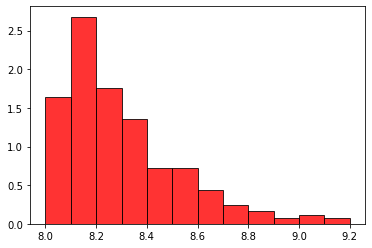

In [69]:
rate = df['IMDB rating']
ax = plt.hist(rate, bins= 12, density=True, alpha=0.8, histtype='bar', edgecolor='black', orientation = 'vertical', color = 'red',)

In [65]:
plt.hist?

In [70]:
#from urllib.error import HTTPError
#from urllib.error import URLError
#try:
#    html = urlopen('http://www.pythonscraping.com/pages/page1.html')
#except HTTPError as e:
#    print(e)
#except URLError as e:
#    print('The server could not be found!')
#else:
#    print('It worked!')
 # program continues. Note: If you return or break in the 
 # exception catch, you do not need to use the "else" statement

In [36]:
#from urllib.request import urlopen
url = 'https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ/ref=sr_1_3?dchild=1&keywords=data%2Banalyst%2Btshirt&qid=1626655184&sr=8-3&customId=B0752XJYNL&th=1'

#get headers with httpbin.org/get
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36 Edg/107.0.1418.62"}
page = requests.get(url, headers = headers)

    
#html = urlopen('http://www.pythonscraping.com/pages/page1.html')
#print(html.read())

bs = BeautifulSoup(page.text, 'html.parser')
Adj_bs = BeautifulSoup(bs.prettify(), 'html.parser')
title = Adj_bs.find(id = 'productTitle').get_text()
price = Adj_bs.find('span',{'class':'a-offscreen'}).get_text()


#print(title)
#print(price)

#Amazon restricting get_text() gonna try a simple imdb page instead

AttributeError: 'NoneType' object has no attribute 'someTag'